In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
# Load monthly sales data 
laptops = pd.read_csv('best_buy_laptops_2024.csv')
laptops.head()

,brand,model,aggregateRating/ratingValue,aggregateRating/reviewCount,offers/price,offers/priceCurrency,depth,width,features/0/description,features/1/description
0,Dell,i7430-7374SLV-PUS,4.7,1088.0,NaN,USD,8.92,12.36,Windows 11 brings back the Start Menu from Win...,"Equipped with a FHD+ IPS touch screen, the bor..."
1,Dell,i3520-5810BLK-PUS,4.6,839.0,NaN,USD,9.27,14.11,Experience the most secure Windows ever built ...,Natural finger-touch navigation makes the most...
2,Lenovo,82YL0002US,4.7,127.0,NaN,USD,8.76,12.51,Windows 11 brings back the Start Menu from Win...,Find the relevant information and ideas you ne...
3,Microsoft,DTI-00001,4.7,926.0,NaN,USD,7.90,11.50,Find the relevant information and ideas you ne...,Iconic 2-in-1 design transforms into what you ...
4,Microsoft,R1S-00062,4.7,422.0,NaN,USD,8.80,12.10,Find the relevant information and ideas you ne...,"Family, friends, passions, music, creations – ..."


This [dataset](https://www.kaggle.com/datasets/kanchana1990/best-buy-2024-windows-laptops?resource=download) encapsulates a comprehensive collection of Windows laptop listings from Best Buy for the 2024.

Column Descriptions:
1. brand (489 non-null, object): The manufacturer of the laptop, covering a diverse range of well-known companies such as Dell, Lenovo, Microsoft, and more, indicating the dataset's breadth in representing different manufacturers.
2. model (488 non-null, object): The specific model identifier for each laptop, providing a unique distinction between different laptop offerings.
3. aggregateRating/ratingValue (357 non-null, float64): The average consumer rating for each laptop on a scale, reflecting overall consumer satisfaction.
4. aggregateRating/reviewCount (357 non-null, float64): The total number of reviews submitted for each laptop, offering insight into the level of consumer engagement and feedback.
5. offers/price (262 non-null, float64): The listed selling price for each laptop on Best Buy, crucial for price trend analysis and market positioning.
6. offers/priceCurrency (489 non-null, object): The currency of the listed price, uniformly denoted as 'USD', ensuring consistency in price data.
7. depth (431 non-null, float64): The front-to-back measurement of each laptop, contributing to the understanding of laptop size and portability.
8. width (431 non-null, float64): The side-to-side measurement, further detailing the physical dimensions of the laptops.
9. features/0/description (486 non-null, object): A description of a primary feature or selling point for the laptop, highlighting unique or standout specifications.
10. features/1/description (483 non-null, object): Descriptions of a secondary feature, providing additional insights into the laptops' capabilities and attractions.

In [25]:
laptops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         489 non-null    object 
 1   Model         488 non-null    object 
 2   Rating        357 non-null    float64
 3   Review Count  357 non-null    float64
 4   Price         262 non-null    float64
 5   Currency      489 non-null    object 
 6   Depth         431 non-null    float64
 7   Width         431 non-null    float64
 8   Features      486 non-null    object 
 9   Description   483 non-null    object 
dtypes: float64(5), object(5)
memory usage: 38.3+ KB


In [16]:
#Check the total number of NaNs for each column
missing_info = laptops.isna().sum()
missing_info

Brand             0
Model             1
Rating          132
Review Count    132
Price           227
Currency          0
Depth            58
Width            58
Features          3
Description       6
dtype: int64

In [15]:
#Renaming columns
laptops.rename(columns={'brand':'Brand',
                             'model': 'Model',
                             'aggregateRating/ratingValue': 'Rating', 
                             'aggregateRating/reviewCount': 'Review Count', 
                             'offers/price': 'Price',
                             'offers/priceCurrency': 'Currency',
                             'depth':'Depth',
                             'width':'Width',
                             'features/0/description':'Features',
                             'features/1/description':'Description'}, inplace=True)
laptops.head()

,Brand,Model,Rating,Review Count,Price,Currency,Depth,Width,Features,Description
0,Dell,i7430-7374SLV-PUS,4.7,1088.0,NaN,USD,8.92,12.36,Windows 11 brings back the Start Menu from Win...,"Equipped with a FHD+ IPS touch screen, the bor..."
1,Dell,i3520-5810BLK-PUS,4.6,839.0,NaN,USD,9.27,14.11,Experience the most secure Windows ever built ...,Natural finger-touch navigation makes the most...
2,Lenovo,82YL0002US,4.7,127.0,NaN,USD,8.76,12.51,Windows 11 brings back the Start Menu from Win...,Find the relevant information and ideas you ne...
3,Microsoft,DTI-00001,4.7,926.0,NaN,USD,7.90,11.50,Find the relevant information and ideas you ne...,Iconic 2-in-1 design transforms into what you ...
4,Microsoft,R1S-00062,4.7,422.0,NaN,USD,8.80,12.10,Find the relevant information and ideas you ne...,"Family, friends, passions, music, creations – ..."


In [17]:
#Filter rows that have Price information 
laptops_cleaned = laptops[~laptops['Price'].isna()]
laptops_cleaned

,Brand,Model,Rating,Review Count,Price,Currency,Depth,Width,Features,Description
13,Acer,PHN16-71-73LT,4.6,343.0,1179.99,USD,11.02,14.18,Windows 11 was designed with you at the center...,"At 16” with a 16:10 aspect ratio, the pristine..."
23,Microsoft,QIL-00001,4.8,517.0,1199.99,USD,8.20,11.30,Find the relevant information and ideas you ne...,Surface Pro 9 gives you the tablet flexibility...
31,Microsoft,QIL-00052,4.8,517.0,1199.99,USD,8.20,11.30,Find the relevant information and ideas you ne...,Surface Pro 9 gives you the tablet flexibility...
45,Microsoft,Z2D-00001,4.4,9.0,3299.99,USD,12.72,9.06,Find the relevant information and ideas you ne...,Windows 11 is optimized for touch on Surface L...
49,MSI,PRE14EVO13269,NaN,NaN,1499.99,USD,9.00,12.00,Microsoft Windows 11 Pro gives you a user-frie...,IPS technology offers wide viewing angles. 192...
...,...,...,...,...,...,...,...,...,...,...
484,Dell,5490,5.0,3.0,365.99,USD,9.00,13.10,Built for business. Protect your data with ent...,Its 1920 x 1080 resolution showcases your game...
485,Lenovo,21EX0008US,5.0,1.0,1449.99,USD,8.46,0.63,Experience enhanced productivity and advanced ...,"Experience stunning visuals on a compact 13.3""..."
486,Lenovo,21HF000CUS,5.0,1.0,1089.99,USD,8.93,0.70,Experience enhanced productivity and advanced ...,"Indulge in breathtaking visuals on a 14"" WUXGA..."
487,Lenovo,21EX0003US,NaN,NaN,1249.99,USD,8.46,0.63,Experience enhanced productivity and advanced ...,"Experience stunning visuals on a compact 13.3""..."


In [18]:
#ave price vs brand pivot table
price_brand = pd.pivot_table(laptops_cleaned, values = "Price", index = "Brand", columns=None, aggfunc="mean", fill_value=None, margins=False, dropna=True, margins_name='All', observed=True)
price_brand_sorted = price_brand.sort_values(by='Price', ascending=False)
price_brand_sorted

,Price
Brand,
Razer,3049.990000
GIGABYTE,1756.240000
MSI,1718.885263
Alienware,1649.990000
ASUS,1524.552500
Microsoft,1320.941000
Dell,1273.205714
LG,1079.990000
Acer,1034.403793


<Axes: title={'center': 'Average Price by Brand'}, xlabel='Brand', ylabel='Average Price'>

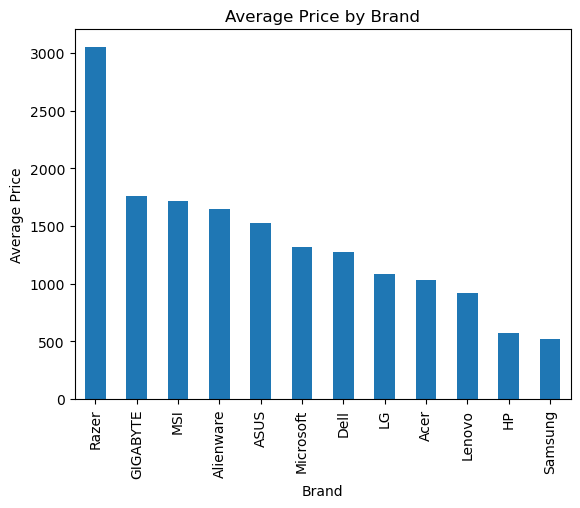

In [19]:
price_brand_bar = price_brand_sorted.plot(kind="bar", xlabel="Brand", ylabel="Average Price", title="Average Price by Brand", legend=False)
price_brand_bar

In [29]:
average_rating = laptops_cleaned.groupby("Brand")["Rating"].mean()
laptops_cleaned.loc[:, "Average Rating"] = laptops_cleaned["Brand"].map(average_rating)
laptops_cleaned.head()

C:\Users\Theresa\AppData\Local\Temp\ipykernel_12068\1832049337.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Brand,Model,Rating,Review Count,Price,Currency,Depth,Width,Features,Description,Average Rating
13,Acer,PHN16-71-73LT,4.6,343.0,1179.99,USD,11.02,14.18,Windows 11 was designed with you at the center...,"At 16” with a 16:10 aspect ratio, the pristine...",4.352941
23,Microsoft,QIL-00001,4.8,517.0,1199.99,USD,8.20,11.30,Find the relevant information and ideas you ne...,Surface Pro 9 gives you the tablet flexibility...,4.508333
31,Microsoft,QIL-00052,4.8,517.0,1199.99,USD,8.20,11.30,Find the relevant information and ideas you ne...,Surface Pro 9 gives you the tablet flexibility...,4.508333
45,Microsoft,Z2D-00001,4.4,9.0,3299.99,USD,12.72,9.06,Find the relevant information and ideas you ne...,Windows 11 is optimized for touch on Surface L...,4.508333
49,MSI,PRE14EVO13269,NaN,NaN,1499.99,USD,9.00,12.00,Microsoft Windows 11 Pro gives you a user-frie...,IPS technology offers wide viewing angles. 192...,3.740000
